# Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import  and check data

In [2]:
# turn a project folder path into a string

path = r'/Users/mart/Documents/06-2022 Instacart Basket Analysis'

In [3]:
# import 'cust_ords_prods_merge.pkl' which contains the new customers column.

cust_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge.pkl'))

In [4]:
# import departments wrangled

departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

In [5]:
cust_ords_prods_merge.shape

(32404859, 30)

In [6]:
cust_ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,first_time_order,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,True,1,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,False,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
cust_ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   user_id                        object  
 1   first_name                     object  
 2   surname                        object  
 3   gender                         object  
 4   state                          object  
 5   age                            int64   
 6   date_joined                    object  
 7   n_dependants                   int64   
 8   fam_status                     object  
 9   income                         int64   
 10  product_id                     object  
 11  product_name                   object  
 12  aisle_id                       object  
 13  department_id                  int64   
 14  prices                         float64 
 15  order_id                       object  
 16  order_number                   int64   
 17  orders_day_of_week       

In [8]:
departments.shape

(21, 1)

In [9]:
departments.head(21)

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


# Merge cust_ords_prods_merge and departments 

In [10]:
 cust_ords_prods_merge = cust_ords_prods_merge.merge(departments, left_on = 'department_id', how = 'inner', right_index = True)

In [11]:
cust_ords_prods_merge.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,...,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,_merge,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,both,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,both,beverages
18,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,1,0,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,beverages
19,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,6,1,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,beverages


In [12]:
cust_ords_prods_merge[['product_id','product_name','department_id','department']].head()

,product_id,product_name,department_id,department
0,196,Soda,7,beverages
1,196,Soda,7,beverages
2,196,Soda,7,beverages
18,196,Soda,7,beverages
19,196,Soda,7,beverages


In [13]:
cust_ords_prods_merge.shape

(32404859, 31)

# Address PII data

In [14]:
# drop first_name and surname columns because of any possible security implications 
# drop '_merge' because it is irrelevant for the future analysis 

cust_ords_prods_merge = cust_ords_prods_merge.drop(columns=['first_name', 'surname', '_merge']) 

In [15]:
cust_ords_prods_merge.shape

(32404859, 28)

# Regional segmentation

In [16]:
# create a regional segmentation of the data

regions = {'Maine' : 'Northeast', 'New Hampshire' : 'Northeast', 'Vermont' : 'Northeast', 'Massachusetts' : 'Northeast', 'Rhode Island' : 'Northeast', 'Connecticut' : 'Northeast', 'New York' : 'Northeast', 'Pennsylvania' : 'Northeast', 'New Jersey': 'Northeast',
         
         'Wisconsin' : 'Midwest', 'Michigan' : 'Midwest', 'Illinois' : 'Midwest', 'Indiana' : 'Midwest', 'Ohio' : 'Midwest', 'North Dakota' : 'Midwest', 'South Dakota' : 'Midwest', 'Nebraska' : 'Midwest', 'Kansas' : 'Midwest', 'Minnesota' : 'Midwest', 'Iowa' : 'Midwest', 'Missouri' : 'Midwest',
          
         'Delaware' : 'South', 'Maryland' : 'South', 'District of Columbia' : 'South', 'Virginia' : 'South', 'West Virginia' : 'South', 'North Carolina' : 'South', 'South Carolina' : 'South', 'Georgia' : 'South','Florida' : 'South', 'Kentucky' : 'South', 'Tennessee' : 'South', 'Mississippi' : 'South','Alabama' : 'South','Oklahoma' : 'South', 'Texas' : 'South', 'Arkansas' : 'South', 'Louisiana' : 'South',
         
         'Idaho' : 'West', 'Montana' : 'West', 'Wyoming' : 'West', 'Nevada' : 'West', 'Utah' : 'West', 'Colorado' : 'West', 'Arizona' : 'West', 'New Mexico' : 'West', 'Alaska' : 'West', 'Washington' : 'West','Oregon' : 'West','California' : 'West', 'Hawaii' : 'West'
         }

In [17]:
# define function get_region

def get_region(state):
    return regions[state]

In [18]:
cust_ords_prods_merge['region'] = cust_ords_prods_merge['state'].apply(get_region)

In [19]:
cust_ords_prods_merge.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,department,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,0,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,1,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,2,1,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,1,0,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West
19,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,6,1,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West


In [20]:
# check for missing value in the column 'region'

cust_ords_prods_merge['region'].isnull().sum()

0

In [21]:
# count values for each region

cust_ords_prods_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [22]:
# check the spending habits between the different U.S. regions

spending_habits = pd.crosstab(cust_ords_prods_merge['region'], cust_ords_prods_merge['spending_flag'], dropna = False)
spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


In [23]:
# check in which regions are buying most products

cust_ords_prods_merge[['region', 'product_id']].groupby('region').agg('count').sort_values(by='product_id', ascending=False)

,product_id
region,
South,10791885
West,8292913
Midwest,7597325
Northeast,5722736


In [24]:
# check in which region most orders are being made

cust_ords_prods_merge[['region', 'order_id']].groupby('region').agg('count').sort_values(by='order_id', ascending=False)

,order_id
region,
South,10791885
West,8292913
Midwest,7597325
Northeast,5722736


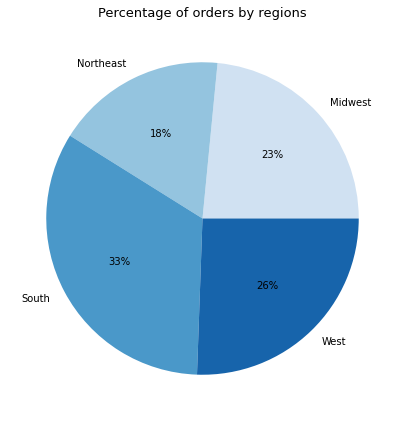

In [25]:
data = cust_ords_prods_merge[['region', 'order_id']].groupby(['region']).nunique().sort_index()

region_orders_pie = data['order_id'].plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 4), autopct = '%2.0f%%')
plt.ylabel('')
plt.title('Percentage of orders by regions',fontsize=13)
plt.show()

In [26]:
# check the ordering habits between the different regions

ordering_habits = pd.crosstab(cust_ords_prods_merge['region'], cust_ords_prods_merge['order_frequency_flag'], dropna = False)
ordering_habits

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5017709,863419,1716197
Northeast,3804566,630182,1287988
South,7192372,1215088,2384420
West,5545206,927748,1819959


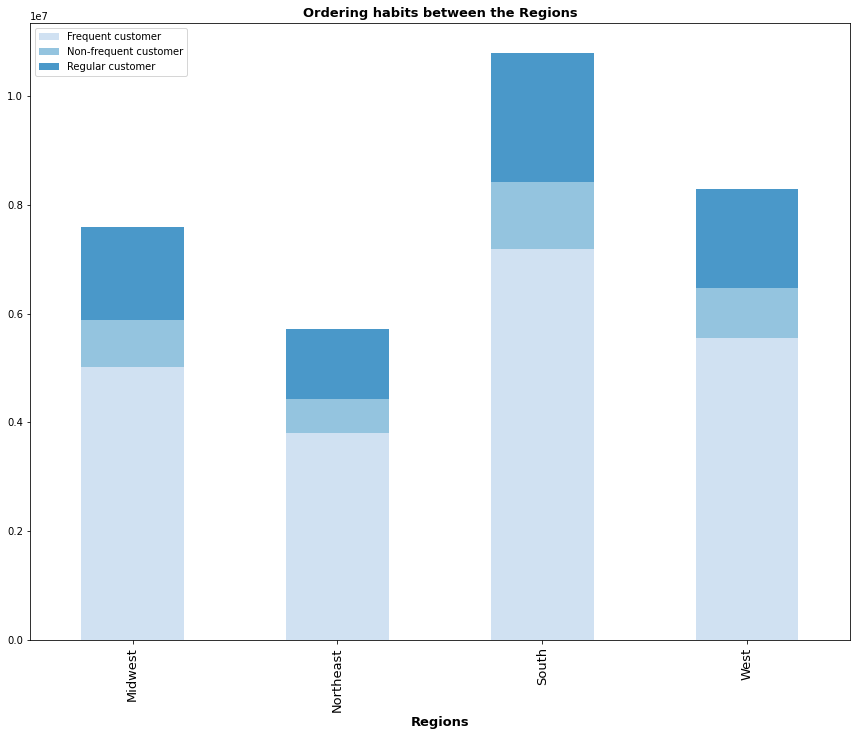

In [27]:
#Creating a stacked bar chart of the order_frequency, divided up by the regions

ord_hab_stab = ordering_habits.plot(kind = 'bar', figsize = (12,10), stacked = True, color = sns.color_palette('Blues', 4))
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel('Regions', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.title('Ordering habits between the Regions', fontsize = 13, fontweight = 'bold')
plt.show()

# Exclusion flag

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

Make sure you export this sample.

In [28]:
cust_ords_prods_merge['max_order'].describe()

count    3.240486e+07
mean     3.305217e+01
std      2.515525e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      4.700000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [29]:
# create an eclusion flag for low-activity customers

cust_ords_prods_merge.loc[cust_ords_prods_merge['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'
cust_ords_prods_merge.loc[cust_ords_prods_merge['max_order'] >= 5, 'exclusion_flag'] = 'Active customer'

In [30]:
# count High and Low-activity customers

cust_ords_prods_merge['exclusion_flag'].value_counts(dropna = False)

Active customer          30964564
Low-activity customer     1440295
Name: exclusion_flag, dtype: int64

In [31]:
cust_ords_prods_merge.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,department,region,exclusion_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,0,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,Active customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,Active customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,1,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,Active customer
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,0,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,Active customer
19,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,1,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,Active customer


In [32]:
cust_ords_prods_merge.shape

(32404859, 30)

In [33]:
# create a subset with only low-activity customers

Low_activity_customers = cust_ords_prods_merge.loc[cust_ords_prods_merge['exclusion_flag']=='Low-activity customer']

In [34]:
Low_activity_customers.shape

(1440295, 30)

In [35]:
# export low-activity customers set

Low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low-activty_cust.pkl'))

In [36]:
# delete low-activity customers

cust_ords_prods_merge.drop(cust_ords_prods_merge.loc[cust_ords_prods_merge['exclusion_flag']=='Low-activity customer'].index, inplace=True)

In [37]:
cust_ords_prods_merge['exclusion_flag'].value_counts(dropna = False)

Active customer    30964564
Name: exclusion_flag, dtype: int64

In [38]:
cust_ords_prods_merge.shape

(30964564, 30)

# Customer Profiling

In [39]:
# create new df with customers only

customers = cust_ords_prods_merge.drop_duplicates(subset=['user_id'])
customers.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,department,region,exclusion_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,0,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,Active customer
18,33890,Female,New Mexico,36,1/1/2017,0,single,59285,196,Soda,...,0,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,Active customer
91,65803,Male,Idaho,35,1/1/2017,2,married,99568,196,Soda,...,0,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,Active customer
195,125935,Female,Iowa,40,1/1/2017,0,single,42049,196,Soda,...,0,18,Regular customer,6.371795,Low spender,18.0,Regular customer,beverages,Midwest,Active customer
351,130797,Female,Maryland,26,1/1/2017,1,married,40374,196,Soda,...,0,23,Regular customer,6.305128,Low spender,8.0,Frequent customer,beverages,South,Active customer


In [40]:
customers.shape

(162631, 30)

In [41]:
# check from which regions are coming the majority of customers 

customers[['region', 'user_id']].groupby('region').agg({'user_id': pd.Series.nunique}).sort_values(by='user_id', ascending=False)

,user_id
region,
South,54193
West,41481
Midwest,38376
Northeast,28581


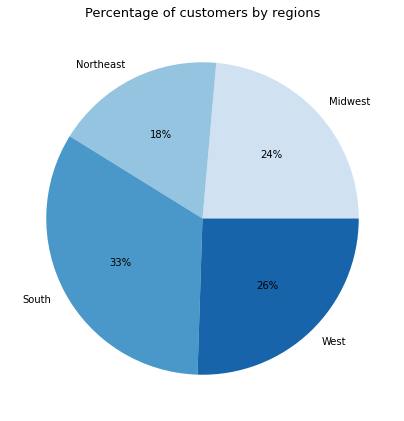

In [42]:
# Percentage of customers by regions

data = customers[['region', 'user_id']].groupby(['region']).nunique().sort_index()

region_pie = data['user_id'].plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 4), autopct = '%2.0f%%')
plt.ylabel('')
plt.title('Percentage of customers by regions',fontsize=13)
plt.show()

## Age

In [44]:
# create a flag that assigns an “age_category” label to a user ID based on its age

customers.loc[(customers['age'] >= 18) & (customers['age']<= 30), 'age_category'] = 'Young Adults'

customers.loc[(customers['age'] > 30) & (customers['age']<= 45), 'age_category'] = 'Middle-aged Adults'

customers.loc[customers['age'] > 45, 'age_category'] = 'Old-aged Adults'

In [45]:
customers['age_category'].value_counts(dropna = False)

Old-aged Adults       91635
Middle-aged Adults    37990
Young Adults          33006
Name: age_category, dtype: int64

In [46]:
ordering_habits_by_age = pd.crosstab(customers['age_category'], cust_ords_prods_merge['order_frequency_flag'], dropna = False)
ordering_habits_by_age

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_category,,,
Middle-aged Adults,17771,8548,11671
Old-aged Adults,42763,20671,28201
Young Adults,15393,7446,10167


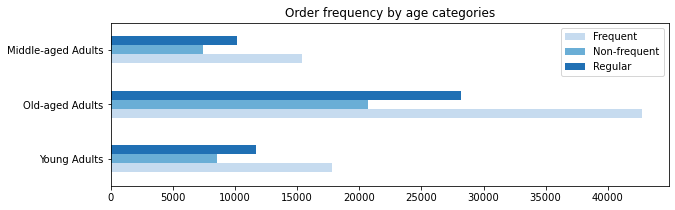

In [47]:
# order frequency by age categories

order_age_barh = ordering_habits_by_age.plot.barh(color = sns.color_palette('Blues', 3), figsize=(10,3),title ='Order frequency by age categories')
plt.yticks([0,1,2], labels=['Young Adults', 'Old-aged Adults', 'Middle-aged Adults'])
plt.ylabel('')
plt.legend(['Frequent','Non-frequent','Regular'])

In [48]:
# percentage of total customers for each age category and order frequency

tot_cust_age_order = pd.crosstab(customers['age_category'],cust_ords_prods_merge['order_frequency_flag']).apply(lambda r:r/len(customers), axis=1).round(2)*100
tot_cust_age_order


order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_category,,,
Middle-aged Adults,11.0,5.0,7.0
Old-aged Adults,26.0,13.0,17.0
Young Adults,9.0,5.0,6.0


In [49]:
# order frequency by family status

ord_fam = pd.crosstab(customers['order_frequency_flag'], cust_ords_prods_merge['fam_status'], dropna = False)
ord_fam 

fam_status,divorced/widowed,living with parents and siblings,married,single
order_frequency_flag,,,,
Frequent customer,6517,3616,53405,12389
Non-frequent customer,3054,1729,25790,6092
Regular customer,4260,2263,35101,8415


In [50]:
ord_fam.to_clipboard()

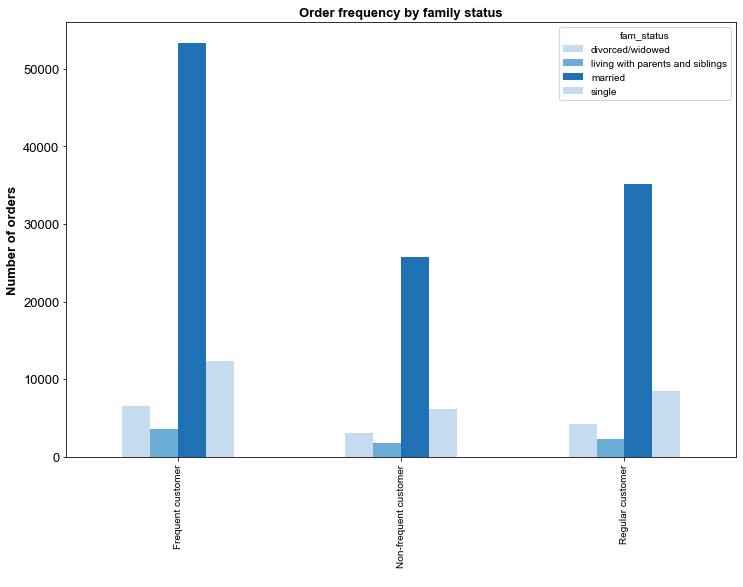

In [51]:
# Order frequency by family status bar chart

ord_fam_bar = ord_fam.plot.bar(figsize = (12,8), color = sns.color_palette('Blues', 3))

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel(' ')
plt.ylabel('Number of orders', fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.title('Order frequency by family status', fontsize = 13, fontweight = 'bold')
plt.show()

## Income

In [52]:
customers['income'].describe()

count    162631.000000
mean      95686.508821
std       42743.386453
min       25903.000000
25%       61717.500000
50%       94292.000000
75%      125165.000000
max      593901.000000
Name: income, dtype: float64

In [54]:
# create a flag that assigns an “income_category” label to a user ID based on its income(acording to money.usnews.com)

customers.loc[customers['income'] < 52200, 'income_category'] = 'Low income'

customers.loc[(customers['income'] >= 52200) & (customers['income']<= 156600), 'income_category'] = 'Middle income'

customers.loc[customers['income'] > 156600, 'income_category'] = 'High income'

In [55]:
#count customers for each income group

income_cat_count = customers['income_category'].value_counts(dropna = False)
income_cat_count

Middle income    122491
Low income        27131
High income       13009
Name: income_category, dtype: int64

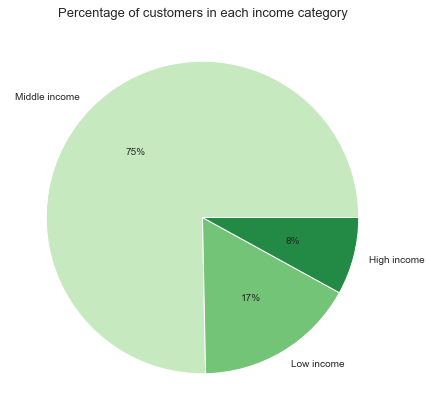

In [56]:
income_pie = income_cat_count.plot.pie(figsize = (7,8), colors = sns.color_palette('Greens', 3), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of customers in each income category',fontsize=13)
plt.show()

In [57]:
income_fam_status = pd.crosstab(customers['income_category'], cust_ords_prods_merge['fam_status'], dropna = False)
income_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
income_category,,,,
High income,1697,43,9690,1579
Low income,1821,1694,18603,5013
Middle income,10313,5871,86003,20304


In [58]:
# Percentage by income_category and age_category

pd.crosstab(customers.income_category, customers.age_category, normalize='index').round(4)*100

age_category,Middle-aged Adults,Old-aged Adults,Young Adults
income_category,,,
High income,13.54,84.93,1.52
Low income,27.49,44.94,27.57
Middle income,23.49,55.83,20.68


Old-aged Adults have majority of the High income (84,93 %), while Young adults and Middle-agged Adults have almost same percentage of Low income, around 27,5 %.

In [59]:
# Percentage of income and age categories in the total amount of customers

income_age_p = pd.crosstab(customers.age_category,customers.income_category).apply(lambda r:r/len(customers), axis=1).round(4)*100
income_age_p

income_category,High income,Low income,Middle income
age_category,,,
Middle-aged Adults,1.08,4.59,17.69
Old-aged Adults,6.79,7.50,42.05
Young Adults,0.12,4.60,15.57


Most of the customers (42,05 %) are Old_aged Adults who have mostly a Middle income 

In [60]:
income_age_p.to_clipboard()

## Number of dependants

In [61]:
customers['n_dependants'].describe()

count    162631.000000
mean          1.498675
std           1.118166
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: n_dependants, dtype: float64

In [63]:
# create a flag that assigns an “n_dependants” label to a user ID based on its age

customers.loc[customers['n_dependants'] == 0, 'dependants_category'] = 'No dependents'

customers.loc[customers['n_dependants'] ==1, 'dependants_category'] = 'One dependants'

customers.loc[customers['n_dependants'] > 1, 'dependants_category'] = 'More than one dependants'

In [64]:
depen_count = customers['dependants_category'].value_counts(dropna = False)
depen_count

More than one dependants    81215
No dependents               40727
One dependants              40689
Name: dependants_category, dtype: int64

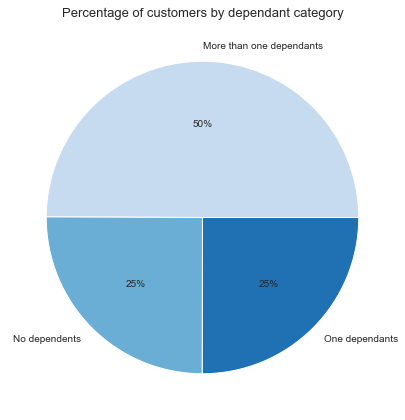

In [65]:
n_depen_pie = depen_count.plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 3), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of customers by dependant category',fontsize=13)
plt.show()

In [66]:
# aggregate an income for dependants_category 

customers.groupby('dependants_category').agg({'income': ['mean','min','max']})

income               
                                  mean    min     max
dependants_category                                  
More than one dependants  95732.194090  25911  593901
No dependents             95604.899796  25903  584097
One dependants            95677.006537  25937  579397

In [67]:
# order frequency by dependants category

ord_freq_dep = pd.crosstab(customers['order_frequency_flag'], customers['dependants_category'], dropna = False)
ord_freq_dep 

dependants_category,More than one dependants,No dependents,One dependants
order_frequency_flag,,,
Frequent customer,38033,18906,18988
Non-frequent customer,18275,9146,9244
Regular customer,24907,12675,12457


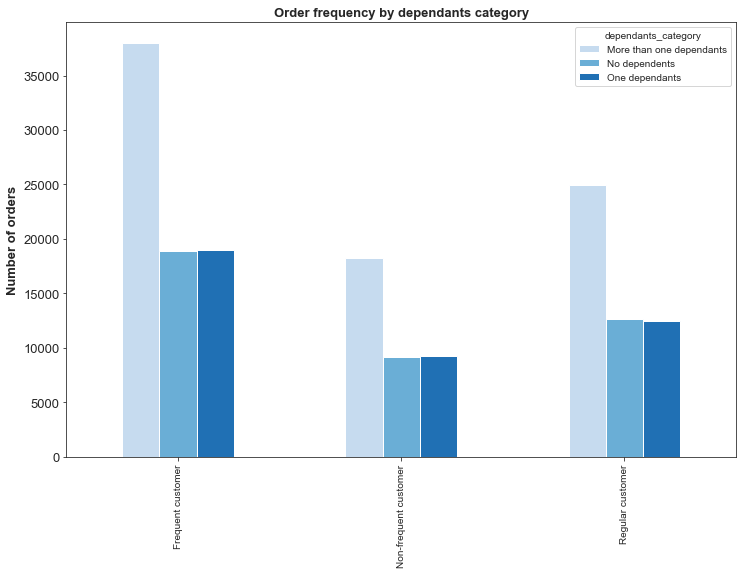

In [68]:
# Order frequency by dependants category

ord_freq_dep_bar = ord_freq_dep.plot.bar(figsize = (12,8), color = sns.color_palette('Blues', 3))

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel(' ')
plt.ylabel('Number of orders', fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.title('Order frequency by dependants category', fontsize = 13, fontweight = 'bold')
plt.show()

In [69]:
# spending habits by dependants category

spend_dep = pd.crosstab(customers['dependants_category'],customers['spending_flag'], dropna = False)
spend_dep 

spending_flag,High spender,Low spender
dependants_category,,
More than one dependants,962,80253
No dependents,515,40212
One dependants,441,40248


In [70]:
spend_dep.to_clipboard()

## Departments

### Baby flag

In [71]:
# create a "baby_flag" by identifying custumers buying on that department

cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] == 'babies', 'baby_flag'] = 'Having baby'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] != 'babies', 'baby_flag'] = 'Not having baby'                         

In [72]:
baby_count = cust_ords_prods_merge['baby_flag'].value_counts(dropna = False)
baby_count

Not having baby    30554172
Having baby          410392
Name: baby_flag, dtype: int64

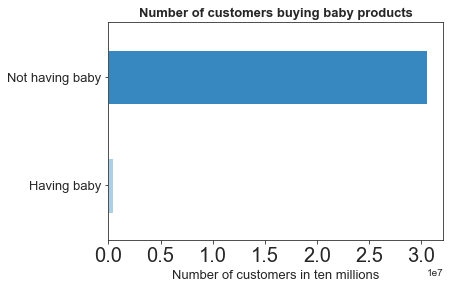

In [73]:
#number of customers buying baby prodacts-bar chart

baby_bar = cust_ords_prods_merge['baby_flag'].value_counts().sort_values().plot.barh(color = sns.color_palette('Blues', 2), fontsize=20)

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel('Number of customers in ten millions',fontsize = 13)
plt.ylabel('')
plt.yticks(fontsize = 13)
plt.title('Number of customers buying baby products', fontsize = 13, fontweight = 'bold')
plt.show()

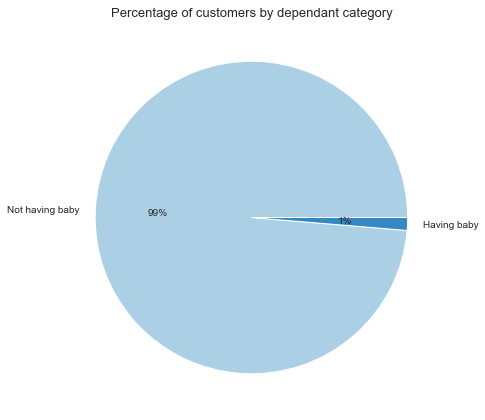

In [74]:
baby_count_pie = baby_count.plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 2), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of customers by dependant category',fontsize=13)
plt.show()

In [75]:
order_frequency_having_baby = pd.crosstab(cust_ords_prods_merge['order_frequency_flag'], cust_ords_prods_merge['baby_flag'], dropna = False )
order_frequency_having_baby 

baby_flag,Having baby,Not having baby
order_frequency_flag,,
Frequent customer,316214,20888262
Non-frequent customer,25297,2869678
Regular customer,68881,6796232


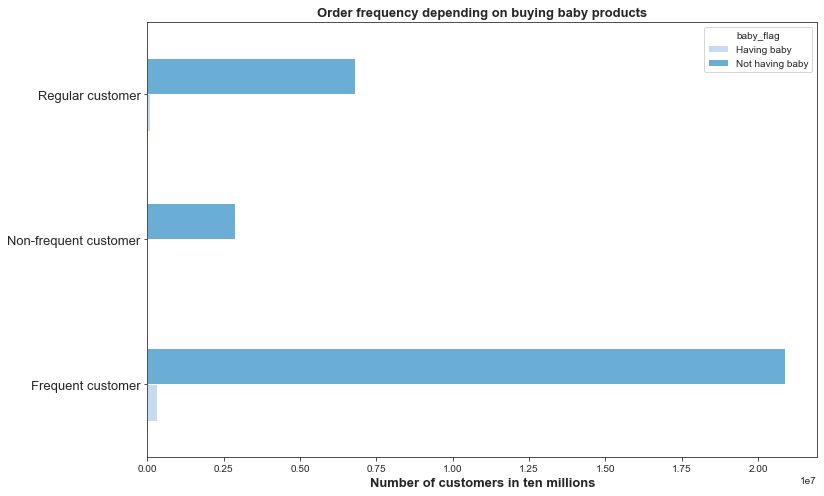

In [76]:
baby_barh = order_frequency_having_baby.plot.barh(figsize = (12,8), color = sns.color_palette('Blues', 3))

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel('Number of customers in ten millions',fontsize = 13, fontweight = 'bold')
plt.ylabel('')
plt.yticks(fontsize = 13)
plt.title('Order frequency depending on buying baby products', fontsize = 13, fontweight = 'bold')
plt.show()

In [77]:
cust_ords_prods_merge.groupby('baby_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
baby_flag                           
Having baby      7.634399  1.0  15.0
Not having baby  7.792688  1.0  25.0

### Pet flag

In [78]:
# create a pet_flag by identifying customers that are buyng products in pet department and apply it on custumers df

cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] == 'pets', 'pet_flag'] = 'Having pets'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] != 'pets', 'pet_flag'] = 'Not having pets' 

In [79]:
cust_ords_prods_merge['pet_flag'].value_counts(dropna = False)

Not having pets    30871504
Having pets           93060
Name: pet_flag, dtype: int64

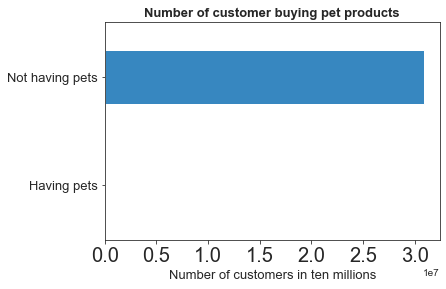

In [80]:
# number of customers buying pet products

pet_bar = cust_ords_prods_merge['pet_flag'].value_counts().sort_values().plot.barh(color = sns.color_palette('Blues', 2), fontsize=20)

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel('Number of customers in ten millions',fontsize = 13)
plt.ylabel('')
plt.yticks(fontsize = 13)
plt.title('Number of customer buying pet products', fontsize = 13, fontweight = 'bold')
plt.show()

In [81]:
cust_ords_prods_merge.groupby('pet_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                        mean min max
pet_flag                            
Having pets        15.995927   1  99
Not having pets    17.839683   1  99

In [82]:
reg_pet = pd.crosstab(cust_ords_prods_merge['region'], cust_ords_prods_merge['pet_flag'], dropna = False )
reg_pet

pet_flag,Having pets,Not having pets
region,,
Midwest,21358,7240155
Northeast,17734,5446951
South,29909,10281230
West,24059,7903168


In [83]:
reg_pet.to_clipboard()

### Vegetarian flag

In [84]:
# create a Veget_flag by identifying customers that are (not) buyng products in meat/seafood department and applying it 

cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] != 'meat seafood', 'veget_flag'] = 'Vegetarian'
cust_ords_prods_merge.loc[cust_ords_prods_merge['department'] == 'meat seafood', 'veget_flag'] = 'Not vegetarian' 

In [85]:
cust_ords_prods_merge['veget_flag'].value_counts(dropna = False)

Vegetarian        30289783
Not vegetarian      674781
Name: veget_flag, dtype: int64

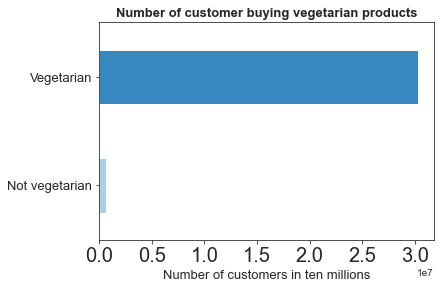

In [86]:
# number of customers buying vegetarian products

veget_bar = cust_ords_prods_merge['veget_flag'].value_counts().sort_values().plot.barh(color = sns.color_palette('Blues', 2), fontsize=20)

sns.set_style('ticks')
plt.yticks(fontsize = 13)
plt.xlabel('Number of customers in ten millions',fontsize = 13)
plt.ylabel('')
plt.yticks(fontsize = 13)
plt.title('Number of customer buying vegetarian products', fontsize = 13, fontweight = 'bold')
plt.show()

In [87]:
cust_ords_prods_merge.groupby('veget_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                       mean min max
veget_flag                         
Not vegetarian    16.576910   1  99
Vegetarian        17.862149   1  99

In [88]:
cust_ords_prods_merge.groupby('pet_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
pet_flag                            
Having pets      7.887489  1.0  15.0
Not having pets  7.790298  1.0  25.0

In [89]:
veget_regio = pd.crosstab(cust_ords_prods_merge['region'], cust_ords_prods_merge['veget_flag'], dropna = False )
veget_regio

veget_flag,Not vegetarian,Vegetarian
region,,
Midwest,158260,7103253
Northeast,118571,5346114
South,224120,10087019
West,173830,7753397


In [90]:
veget_regio.to_clipboard()

# Key questions

* What is the busiest day of the week?

In [91]:
# on which days most orders take place

cust_ords_prods_merge['orders_day_of_week'].value_counts (dropna = False)

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

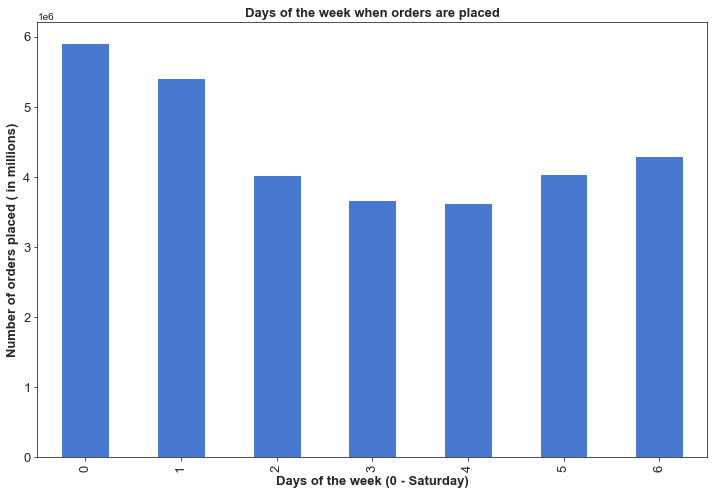

In [92]:
# on which days most orders take place - bar chart

dow_orders_bar = cust_ords_prods_merge['orders_day_of_week'].value_counts().sort_index(ascending=True).plot.bar(figsize = (12,8), color = sns.color_palette("muted")[0])

sns.set_style('ticks')
plt.xlabel('Days of the week (0 - Saturday)',fontsize=13, fontweight = 'bold')
plt.ylabel('Number of orders placed ( in millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Days of the week when orders are placed',fontsize=13, fontweight = 'bold')
plt.show()

* Is there a particular time of the day that is busy?

In [93]:
# identify the busiest hours of the day

cust_ords_prods_merge['order_hour_of_day' ].value_counts (dropna = False)

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: order_hour_of_day, dtype: int64

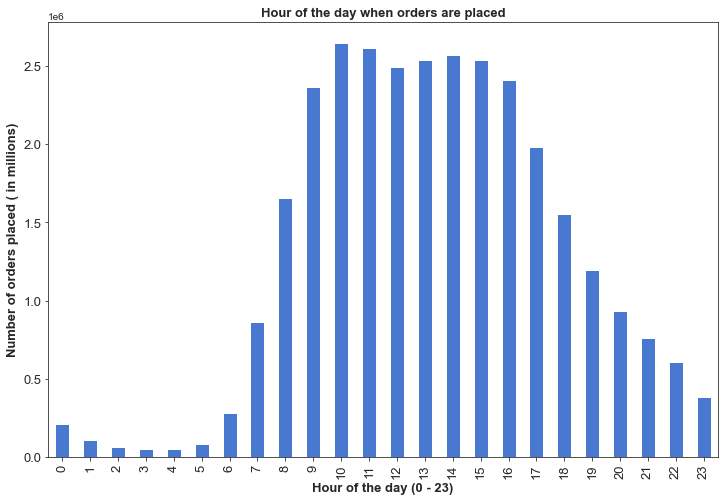

In [94]:
# what time of the day most orders take place - bar chart

hod_orders_bar = cust_ords_prods_merge['order_hour_of_day'].value_counts().sort_index().plot.bar(figsize = (12,8), color = sns.color_palette("muted")[0])

sns.set_style('ticks')
plt.xlabel('Hour of the day (0 - 23)',fontsize=13, fontweight = 'bold')
plt.ylabel('Number of orders placed ( in millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Hour of the day when orders are placed',fontsize=13, fontweight = 'bold')
plt.show()

###### The majority of orders were placed between 9 am and 16 pm, during the lunch hour, as shown by the chart. The busiest hour is specifically around 10 am. It seems that customers prefer to place orders during their free time or after they get home from work because that is when they can order the necessary groceries.

* Distribution of orders based on a customer's loyalty status

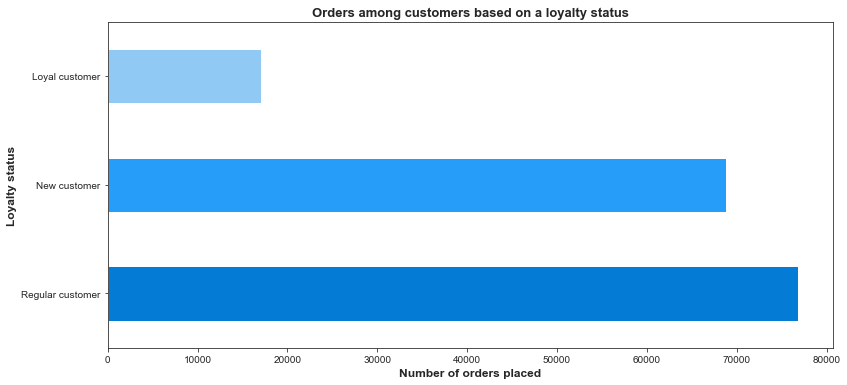

In [95]:
# check the distribution of orders among customers in terms of loyalty

bar_orders_loyal = customers['loyalty_flag'].value_counts().plot.barh(figsize = (13,6), color = ['#047CD6','#269EF9','#8FC9F4'])

sns.set_style('ticks')
plt.xlabel('Number of orders placed',fontsize=12, fontweight = 'bold')
plt.ylabel('Loyalty status',fontsize=12, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Orders among customers based on a loyalty status',fontsize=13, fontweight = 'bold')
plt.show()

In [96]:
customers['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

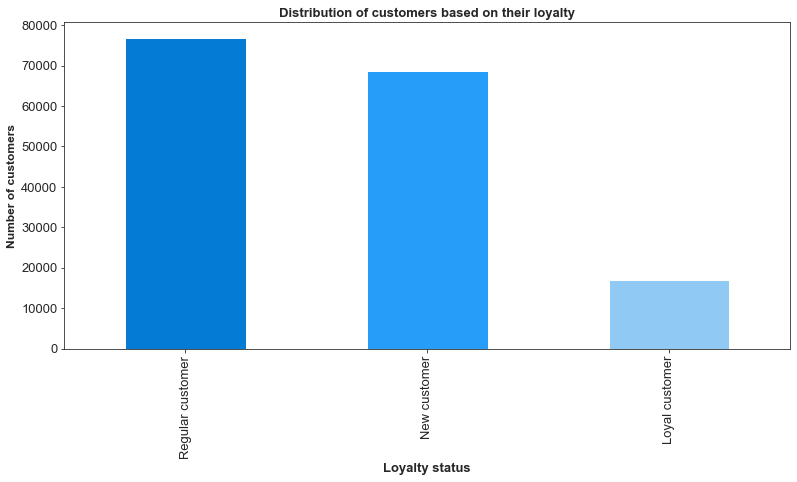

In [97]:
cust_count_bar = customers['loyalty_flag'].value_counts().plot.bar(figsize = (13,6), color = ['#047CD6','#269EF9','#8FC9F4'])

sns.set_style('ticks')
plt.xlabel('Loyalty status',fontsize=13, fontweight = 'bold')
plt.ylabel('Number of customers',fontsize=12, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Distribution of customers based on their loyalty',fontsize=13, fontweight = 'bold')
plt.show()

* Which departments have the highest frequency of product orders?

In [98]:
# count the orders for each department

cust_ords_prods_merge['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

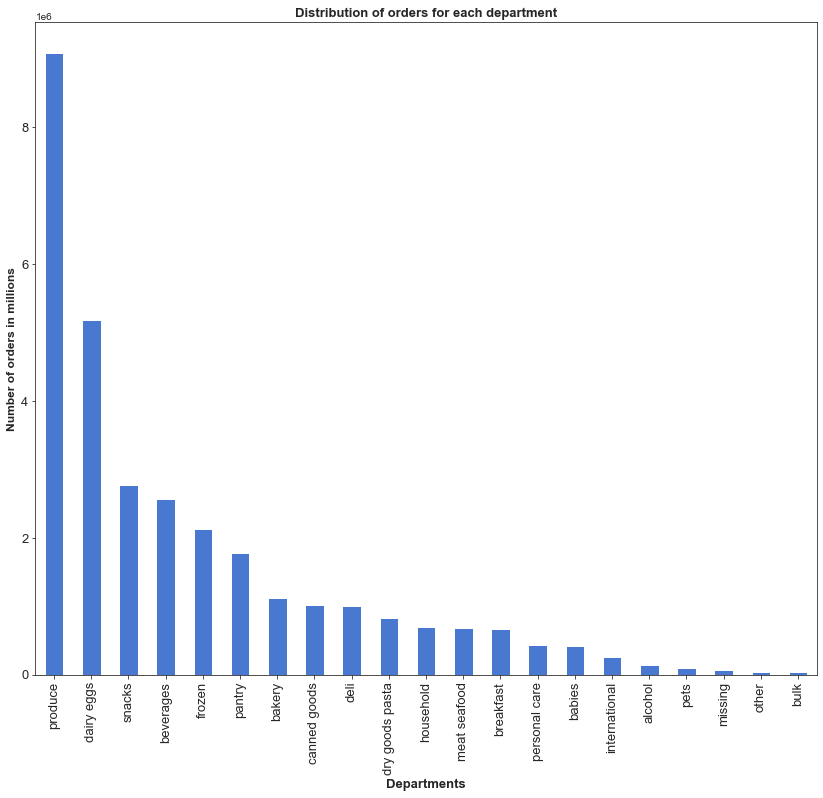

In [99]:
# count the orders for each department bar chart

dep_ord_bar=cust_ords_prods_merge['department'].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = sns.color_palette("muted")[0],figsize=[14,12])

sns.set_style('ticks')
plt.xlabel('Departments',fontsize=13, fontweight = 'bold')
plt.ylabel('Number of orders in millions',fontsize=12, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Distribution of orders for each department',fontsize=13, fontweight = 'bold')
plt.show()

* Differences in ordering habits based on a customer's region

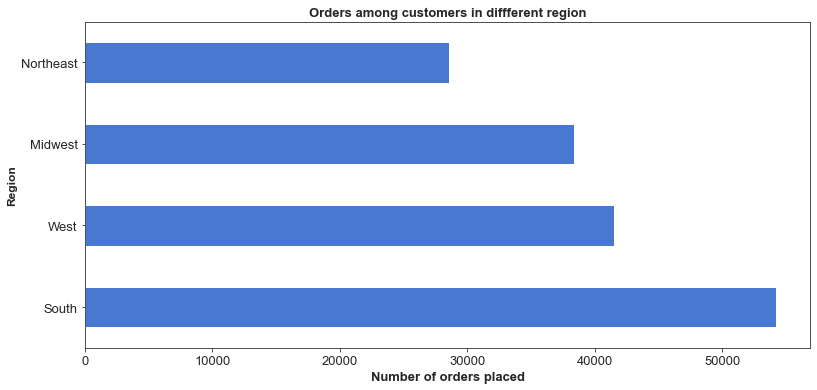

In [100]:
# check the distribution of orders among customers in different regions

barh_orders_loyal = customers['region'].value_counts().plot.barh(figsize = (13,6), color = sns.color_palette("muted")[0])

sns.set_style('ticks')
plt.xlabel('Number of orders placed',fontsize=13, fontweight = 'bold')
plt.ylabel('Region',fontsize=12, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Orders among customers in diffferent region',fontsize=13, fontweight = 'bold')
plt.show()

In [101]:
customers['region'].value_counts()

South        54193
West         41481
Midwest      38376
Northeast    28581
Name: region, dtype: int64

* Explore whether there’s a connection between age and spending power (income)

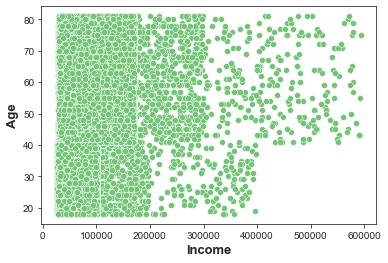

In [102]:
# create a scatterplot to check if ther e is connection between customer's age and spending power

scatter_income_age = sns.scatterplot(x = 'income', y = 'age', data = customers, color = sns.color_palette('Greens',1))
plt.xlabel('Income', fontsize = 13, fontweight = 'bold')
plt.ylabel('Age', fontsize = 13, fontweight = 'bold')
plt.show()

As shown in the scatterplott, most customers have equal purchasing power (up to 200.000 dollars), but only those above the age of 40 have larger purchasing power (incomes greater than 400.000 dollars).

* What is the spending power considering family status?

In [103]:
# spending power compered to family status

pd.crosstab(cust_ords_prods_merge['fam_status'], customers['income_category'], dropna = False)

income_category,High income,Low income,Middle income
fam_status,,,
divorced/widowed,1697,1821,10313
living with parents and siblings,43,1694,5871
married,9690,18603,86003
single,1579,5013,20304


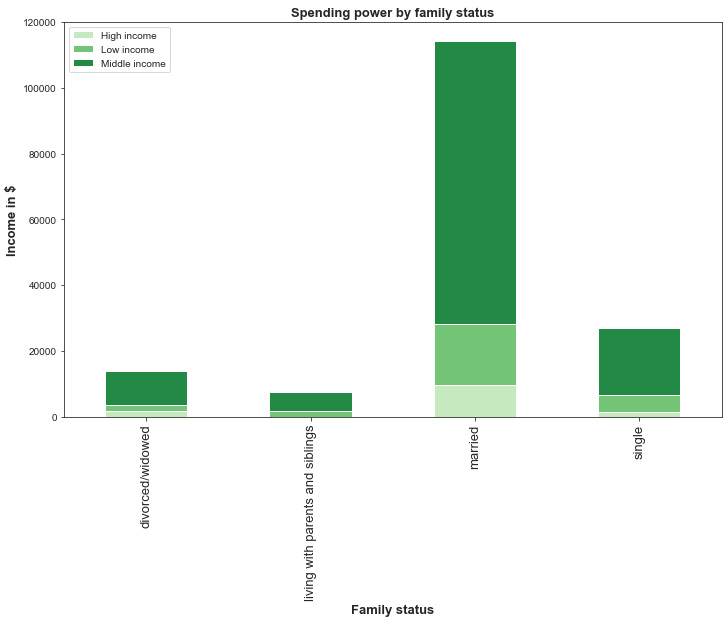

In [104]:
# spending power in terms of family status

income_fam_status = pd.crosstab(cust_ords_prods_merge['fam_status'], customers['income_category'], dropna = False)

income_fam_sbar = income_fam_status.plot(kind = 'bar', figsize = (10,8), stacked = True, color = sns.color_palette('Greens', 3))

plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel('Family status', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.ylabel('Income in $', fontsize = 13, fontweight = 'bold')
plt.yticks(fontsize = 10)
plt.title('Spending power by family status', fontsize = 13, fontweight = 'bold')
plt.show()

# Export charts

In [105]:
region_orders_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_orders_pie.png'))

In [106]:
ord_hab_stab.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_hab_stab.png'))

In [107]:
region_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_pie.png'))

In [108]:
order_age_barh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','order_age_barh.png'))

In [109]:
ord_fam_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_fam_bar.png'))

In [110]:
income_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_pie.png'))

In [111]:
n_depen_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','n_depen_pie.png'))

In [112]:
dow_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','dow_orders_bar.png'))

In [113]:
hod_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hod_orders_bar.png'))

In [114]:
bar_orders_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_loyal.png'))

In [115]:
scatter_income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','scatter_income_age.png'))

In [116]:
income_fam_sbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_fam_sbar.png'))

In [117]:
cust_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_count_bar.png'))

In [118]:
dep_ord_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_ord_bar.png'))

In [119]:
ord_freq_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ord_freq_dep_bar.png'))

In [120]:
baby_count_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_count_pie'))

In [121]:
baby_barh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_barh'))

In [122]:
baby_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_bar'))

In [124]:
veget_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veget_bar'))

In [125]:
pet_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_bar'))

In [126]:
cust_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))